In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_spss('C:/Users/RIYA AGARWAL/Desktop/nc sir/Project 1/Uttarpradesh_edited2_cnns.sav')

In [3]:
#Taking into account state weights
df1 = df.loc[df.index.repeat(df.Weights)]

In [4]:
df1.shape

(179912, 132)

In [5]:
pd.set_option('display.max_rows', 132)
df1.isna().sum()

caseid                      0
state                       0
area                        0
psu_no                      0
psu_no_ov                   0
region                      0
hh_no                       0
int_d                       0
int_m                       0
int_y                       0
sex                         0
q103m                       0
q103y                     670
q104                        0
q111m                       0
q111y                       0
q112                        0
q114                        0
q115                        0
q116                     3007
q117                        0
q125                        0
q201A                       0
q201B                       0
q201C                       0
q201D                       0
q201E                       0
q201F                       0
q201G                       0
q201H                       0
q201I                       0
q201J                       0
q201X                       0
q201Y     

In [6]:
#Data frame with relevant columns having sufficient data points
df2 = df1[['area','sex','q104','q125','q201A','q201B','q201C','q201D','q201E','q201F','q201G','q201H','q201I','q201J','q901r1','height','muac','tsft','ssft','wc','agemons','@_cbmi','Days_Fat','Sugar','cereals','Milk','Pulse','Green_veg','Roots_tubers','veg','fruits','eggs','fish','nonveg','nuts']]

In [7]:
df2.head()

,area,sex,q104,q125,q201A,q201B,q201C,q201D,q201E,q201F,...,Milk,Pulse,Green_veg,Roots_tubers,veg,fruits,eggs,fish,nonveg,nuts
0,rural,female,14.0,yes,Yes,Yes,Yes,No,No,No,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,rural,female,14.0,yes,Yes,Yes,Yes,No,No,No,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,rural,female,14.0,yes,Yes,Yes,Yes,No,No,No,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,rural,female,14.0,yes,Yes,Yes,Yes,No,No,No,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,rural,female,14.0,yes,Yes,Yes,Yes,No,No,No,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


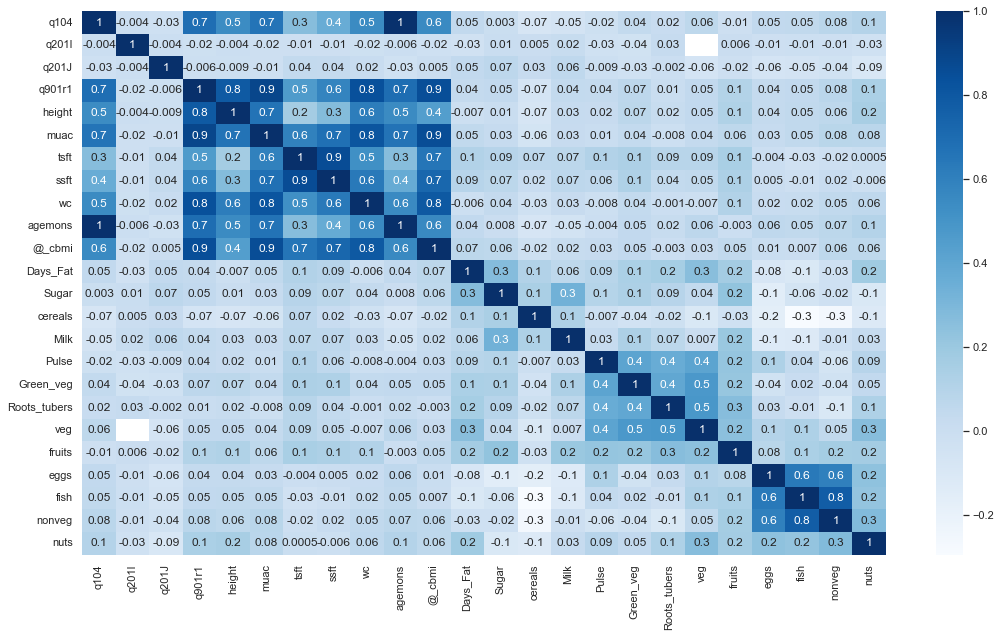

In [8]:
plt.figure(figsize=(18,10))
sns.set_theme(style="white")
corr = df2.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')


# Waist circumference

In [10]:
age_15 = df2[df2['q104']==15.0]
data_15=age_15[['fruits','wc']].dropna()
corr_15=data_15.corr()
print(corr_15)

          fruits        wc
fruits  1.000000  0.442683
wc      0.442683  1.000000


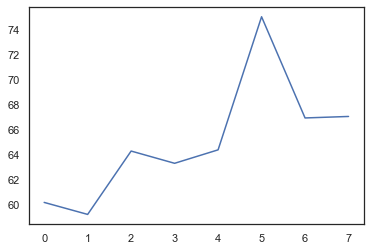

In [11]:
y = data_15.groupby('fruits')['wc'].mean()
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
plt.plot(x,y)

In [12]:
data_15['wc'].describe()

count    5837.000000
mean       64.563492
std         5.790148
min        54.200001
25%        60.400002
50%        63.500000
75%        68.150002
max        81.849998
Name: wc, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wc', ylabel='Density'>

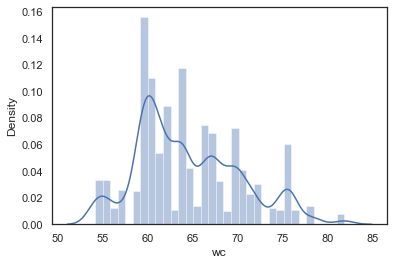

In [13]:
sns.distplot(data_15['wc'])

# Semi-Parametric (Partial Linear)

In [33]:
data_15=age_15[['@_cbmi','fruits','wc']].dropna()

In [34]:
data_15[['@_cbmi','fruits','wc']].isna().sum()

@_cbmi    0
fruits    0
wc        0
dtype: int64

In [35]:
x1 = data_15[['fruits']]
x2 = data_15[['@_cbmi']]
y = data_15[['wc']]

In [40]:
x1_train, x1_test, x2_train,  x2_test, y_train, y_test = train_test_split(x1, x2, y, test_size=0.3, random_state=0)

In [51]:
import statsmodels.api as sm

In [112]:
x1_train=sm.add_constant(x1_train)

In [122]:
X = pd.concat([x2_train, x1_train],axis=1)

In [123]:
model2 = sm.OLS(y_train,X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     2395.
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        12:23:11   Log-Likelihood:                -11411.
No. Observations:                4085   AIC:                         2.283e+04
Df Residuals:                    4082   BIC:                         2.285e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
@_cbmi         1.5459      0.028     54.438      0.000       1.490       1.602
const         33.6181      0.505     66.562      0.000      32.628      34.608
fruits         0.7283      0.028     26.340      0.000       0.674       0.783
==============================================================================
Omnibus:                      133.525   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.603
Skew:                           0.109   Prob(JB):                     2.09e-15
Kurtosis:                       2.408   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
x1_test=sm.add_constant(x1_test)

In [137]:
x_test = pd.concat([x2_test, x1_test],axis=1)

In [138]:
Y_pred = model2.predict(x_test)

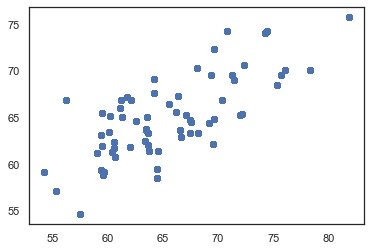

In [140]:
plt.scatter(y_test, Y_pred)

In [141]:
print('MAE:', metrics.mean_absolute_error(y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(y_test,Y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,Y_pred)))

MAE: 3.266579571105196
MSE: 15.85512822955388
RMSE: 1.8073681338081615


# Multi-Linear to compare

In [142]:
Y = data_15['wc']
X = data_15[['@_cbmi','fruits']]

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [144]:
model3 = sm.OLS(Y_train,X_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     wc   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          2.611e+05
Date:                Sun, 21 May 2023   Prob (F-statistic):                        0.00
Time:                        12:31:45   Log-Likelihood:                         -12912.
No. Observations:                4085   AIC:                                  2.583e+04
Df Residuals:                    4083   BIC:                                  2.584e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
@_cbmi         3.3861      0.009    361.784      0.000       3.368       3.404
fruits         0.5829      0.040     14.645      0.000       0.505       0.661
==============================================================================
Omnibus:                      128.735   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.193
Skew:                          -0.420   Prob(JB):                     1.20e-29
Kurtosis:                       2.721   Cond. No.                         8.54
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

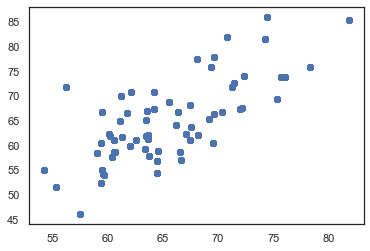

In [146]:
Y_pred = model3.predict(X_test)
plt.scatter(Y_test, Y_pred)

In [147]:
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))

MAE: 4.666300623995267
MSE: 32.219358079010355
RMSE: 2.1601621753922244
